----
## **<font color="crimson"> Ya no funciona, ya tiene su versión corregida </font>**

In [1]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cmcrameri

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install toolz

Note: you may need to restart the kernel to use updated packages.


In [7]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import math
from collections import Counter
from cmcrameri import cm
import jsmetrics

In [8]:
def contour_f(data,contourdata,levels=np.arange(0,11),ccmap='PuBu',extend='max',limite_NS=42,clevels=np.arange(230,300,15),titulo='OLR y pr',cbarlabel='pr  [mm day$^{-1}$]'):
    lons,lats=data.lon,data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    contourdata, lon = add_cyclic_point(contourdata, coord=lons)
    fig = plt.figure(figsize=(10, 6))

    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines()
    cs=ax.contourf(lon,lats,data,levels=levels,cmap=ccmap,extend=extend,transform=ccrs.PlateCarree())
    cc=ax.contour(lon,lats,contourdata,levels=clevels,colors='k',transform=ccrs.PlateCarree())

    ax.clabel(cc, cc.levels, inline=True, fontsize=10)

    ax.set_extent([-180,180, -limite_NS, limite_NS], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo,fontsize=13)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

### **<font color="Purple"> Datos de HadGEM3 </font>**

### **<font color="olive"> Temperatura </font>**

In [9]:
tas_file = 'datasets/tasday79.nc'

In [10]:
#archivo historical
tas_ds=xr.open_dataset(tas_file)
tas=tas_ds['tas']

In [11]:
# Promedio de temperatura por estación 
tas_estacion=tas.groupby(tas.time.dt.season).mean(dim='time') #tas ya está a partir de 1979
tas_djf = tas_estacion[0] #no tiene time

In [12]:
tas_inviernos = tas.sel(time=tas['time.month'].isin([12, 1, 2]))

##### Para promedios móviles

In [13]:
regionHG = tas_inviernos.sel(lat=slice(5, 50), lon=slice(227,297)) #solo djf, meses 1,2,12 

In [14]:
tas_climyear = regionHG.groupby('time.year').mean('time')

In [15]:
tasclimyearsuav = tas_climyear.rolling(year=20, center=True, min_periods=15).mean()

In [16]:
tas_climyearstd = regionHG.groupby('time.year').std('time')

In [17]:
tassuavstd = tas_climyearstd.rolling(year=20, center=True, min_periods=15).mean()

### **<font color="olive"> Viento </font>**

In [1]:
u_99= 'datasets/uaday200hpa_99_mx.nc'
u_14='datasets/uaday200hpa_14_mx.nc'

In [19]:
# Abrir archivos y seleccionar variables a usar 
u_ds99=xr.open_dataset(u_99)
ua99=u_ds99['ua']  
u_ds14=xr.open_dataset(u_14)
ua14=u_ds14['ua']

In [20]:
uHG = xr.concat([ua99, ua14], dim='time')

In [21]:
u_seasonHG=uHG.groupby(uHG.time.dt.season).mean(dim='time') 
u_DJFHG = u_seasonHG[0]

In [22]:
u_inviernosHG = uHG.sel(time=uHG ['time.month'].isin([12, 1, 2]))

### **<font color="Purple"> Datos de ERA-5 </font>**

### **<font color="olive"> Temperatura</font>**

In [23]:
# filet2m_era5 = 'datasets/t2m_daily.nc' este era con kelvin

In [24]:
filet2m_era5 = 'datasets/t2m_dailyC.nc'

In [25]:
t2m_ds=xr.open_dataset(filet2m_era5)
t2m=t2m_ds['t2m']

In [26]:
t2m_anual = t2m.groupby(t2m.time.dt.year).mean(dim='time').mean(dim='year')
# Calcular promedio estacional
t2m_estacion=t2m.groupby(t2m.time.dt.season).mean(dim='time') 
#seleccionar inviernos
invs_E5 = t2m_estacion[0]

In [27]:
t2m_inviernos = t2m.sel(time=t2m['time.month'].isin([12, 1, 2]))

In [28]:
regionE5 = t2m_inviernos.sel(latitude=slice(50, 5), longitude=slice(227,297)) #solo djf, meses 1,2,12 

##### Para promedios móviles

In [29]:
t2m_climyear = regionE5.groupby('time.year').mean('time')

In [30]:
t2mclimyearsuav = t2m_climyear.rolling(year=20, center=True, min_periods=15).mean()

In [31]:
t2m_climyearstd = regionE5.groupby('time.year').std('time')

In [32]:
t2msuavstd = t2m_climyearstd.rolling(year=20, center=True, min_periods=15).mean()

### **<font color="olive"> Viento </font>**

In [33]:
fileu_era5 = 'datasets/u_200_500_daily1979-2019.nc'

In [34]:
u_ds = xr.open_dataset(fileu_era5)
u_era5 = u_ds['u']

In [35]:
#Seleccionar solo 200 hPa 
u200E5 = u_era5.sel(level=200)

In [36]:
u200E5_anual=u200E5.mean(dim='time') 

In [37]:
u200E5_season = u200E5.groupby(u200E5.time.dt.season).mean(dim='time')
uE5_DJF = u200E5_season[0]

In [38]:
u_inviernosE5 = u200E5.sel(time=u200E5['time.month'].isin([12, 1, 2]))

### **<font color="olive"> CAOs de HadGEM </font>**

In [39]:
def CAOS_MXgp(Tdias, mean_mv, std_mv):
    """
    Tdias son todos los días
    mean_mv es el promedio móvil para cada 10 años
    std_mv es la desviación estándar para cada 10 años
    """
    
    # Usar la temperatura suavizada (promedio móvil de 10 años)
    mean = mean_mv.values  # Temperaturas suavizadas (promedio móvil)
    desv_est = std_mv.values  # Desviación estándar suavizada (promedio móvil)
    years=mean_mv.year.values
    # Find the first index where value is not NaN
    first_valid_index = np.argmax(~np.isnan(mean))
    # Find the final where value is not NaN
    last_valid_index = np.argmax(np.isnan(mean))
    print(last_valid_index)
    init_year=years[first_valid_index]
    last_valid_index = np.where(~np.isnan(mean))[0][-1]
    fyear=years[last_valid_index]
    print(init_year,fyear)
    dias_CAO = []
    temp_list = []

    for i in range(0,len(Tdias)-1,1): 
        # Obtener el año del día actual
        year = Tdias['time'].dt.year[i]  # Año del día actual
        
        # Calcular el índice para la serie de 1979 a 2014
        index = year - 1979  # Calculamos el índice para la serie de 1979 a 2014
       # print(year.values)
        if year<init_year:
            index=first_valid_index
        if year>fyear:
            index=last_valid_index
            # 🔍 Find the index of the last non-NaN value
            
        # Verificar que el índice esté dentro del rango correcto
        if index < 0 or index >= len(mean):
            continue  # Si el índice está fuera de rango, se salta esa iteración
        
        # Obtener la temperatura media suavizada y la desviación estándar suavizada para el año correspondiente
        Tmean_suavizada = mean[index]  # Obtener el promedio para ese año
        
        Tstd_suavizada = desv_est[index]  # Desviación estándar para ese año
        #print(Tstd_suavizada)
        # Condición de CAO con la temperatura suavizada y la desviación estándar suavizada
        condicionCAO = Tmean_suavizada - 2 * Tstd_suavizada
        #print(Tdias[i],condicionCAO)
        #print(Tdias['time'][i].values,float(Tdias[i]),float(condicionCAO))
        # Verificar si los días cumplen la condición de CAO (temperatura inferior al umbral)
        if Tdias[i] < condicionCAO and Tdias[i+1] < condicionCAO:
            dias_CAO.append(i)
            #print(Tdias[i],condicionCAO)
            #quit()
            dias_CAO.append(i + 1)
        #if i>10000:
        #    break
    # Eliminar duplicados en los índices de días CAO
    dias_CAOS = list(set(dias_CAO))  # Eliminar duplicados, pero convertir en lista
    print(len(dias_CAOS))
    # Obtener las fechas correspondientes usando los índices
    dias_CAO_dates = Tdias['time'].values[dias_CAOS]  # Aquí accedes correctamente con los índices de días_CAOS
    
    # Convertir las fechas a un calendario gregoriano estándar 
    fechas_CAO_datetime = [pd.to_datetime(str(date)) for date in dias_CAO_dates]
    
    # Crear el diccionario con fechas y sus índices
    fechas_indices = {fecha: dias_CAOS[i] for i, fecha in enumerate(fechas_CAO_datetime)}
        
    # Obtener las temperaturas de los días identificados como CAO
    for fecha, indice in fechas_indices.items():
        temperatura = Tdias[indice].values  # Obtener la temperatura del día indicado
        temp_list.append(temperatura)

    # Promedio de las temperaturas en los días CAO
    promedioT = np.mean(temp_list)
   
    return {'fechas': fechas_indices, 'temperaturas': temp_list, 'freq': len(dias_CAOS) / 36, 'promedioT': promedioT}


In [40]:
#Elegir un cuadro de 4x4
latitudes = tas_inviernos.sel(lat=slice(22,27))
longitudes = latitudes.sel(lon=slice(255,262))

In [41]:
weights = np.cos(np.deg2rad(latitudes.lat))
weights.name = "weights"

In [42]:
tas_weighted = longitudes.weighted(weights)

In [43]:
norte = tas_weighted.mean(['lon','lat']) 

In [44]:
tasclimyearsuav_alineado = tasclimyearsuav.sel(lat=slice(22,27),lon=slice(255,262)).mean(dim=['lat','lon'])
tassuavstd_alineado = tassuavstd.sel(lat=slice(22,27),lon=slice(255,262)).mean(dim=['lat','lon'])

In [45]:
CAOsHG = CAOS_MXgp(norte,tasclimyearsuav_alineado,tassuavstd_alineado) 
fechas_caoHG = CAOsHG['fechas']

0
1984 2010
48


In [46]:
len(fechas_caoHG)

48

In [47]:
indicesHG=[fechas_caoHG[key] for key in CAOsHG['fechas'].keys()]

In [48]:
tempsHG = tas_inviernos.isel(time=indicesHG)

In [49]:
tempsCAOHG=tempsHG.mean('time')

In [50]:
anomaliaHG = tempsCAOHG - tas_djf

In [51]:
#VIENTO
u_et_caoHG = u_inviernosHG.isel(time=indicesHG)

In [52]:
vientoCAOHG = u_et_caoHG.mean('time')

In [53]:
u_anomaliaHG = vientoCAOHG - u_DJFHG

### **<font color="olive"> CAOs de ERA-5</font>**

In [54]:
def CAOS_MXgpE5(Tdias, mean_mv, std_mv):
    """
    Tdias son todos los días
    mean_mv es el promedio móvil para cada 10 años
    std_mv es la desviación estándar para cada 10 años
    """
    
    # Usar la temperatura suavizada (promedio móvil de 10 años)
    mean = mean_mv.values  # Temperaturas suavizadas (promedio móvil)
    desv_est = std_mv.values  # Desviación estándar suavizada (promedio móvil)
    years=mean_mv.year.values
    # Find the first index where value is not NaN
    first_valid_index = np.argmax(~np.isnan(mean))
    # Find the final where value is not NaN
    last_valid_index = np.argmax(np.isnan(mean))
    print(last_valid_index)
    init_year=years[first_valid_index]
    last_valid_index = np.where(~np.isnan(mean))[0][-1]
    fyear=years[last_valid_index]
    print(init_year,fyear)
    dias_CAO = []
    temp_list = []

    for i in range(len(Tdias)-1): 
        # Obtener el año del día actual
        year = Tdias['time'].dt.year[i]  # Año del día actual
        
        # Calcular el índice para la serie de 1979 a 2019
        index = year - 1979  # Calculamos el índice para la serie de 1979 a 2019
        # print(year.values)
        if year<init_year:
            index=first_valid_index
        elif year>fyear:
            index=last_valid_index
        # Verificar que el índice esté dentro del rango correcto
        if index < 0 or index >= len(mean):
            continue  # Si el índice está fuera de rango, se salta esa iteración
        
        # Obtener la temperatura media suavizada y la desviación estándar suavizada para el año correspondiente
        Tmean_suavizada = mean[index]  # Obtener el promedio para ese año
        Tstd_suavizada = desv_est[index]  # Desviación estándar para ese año
        
        # Condición de CAO con la temperatura suavizada y la desviación estándar suavizada
        condicionCAO = Tmean_suavizada - 2 * Tstd_suavizada
        
        # Verificar si los días cumplen la condición de CAO (temperatura inferior al umbral)
        if Tdias[i] < condicionCAO and Tdias[i+1] < condicionCAO:
            dias_CAO.append(i)
            dias_CAO.append(i + 1)

    # Eliminar duplicados en los índices de días CAO
    dias_CAOS = list(set(dias_CAO))  # Eliminar duplicados, pero convertir en lista

    # Obtener las fechas correspondientes usando los índices
    dias_CAO_dates = Tdias['time'].values[dias_CAOS]  # Aquí accedes correctamente con los índices de días_CAOS
    
    # Convertir las fechas a un calendario gregoriano estándar 
    fechas_CAO_datetime = [pd.to_datetime(str(date)) for date in dias_CAO_dates]
    
    # Crear el diccionario con fechas y sus índices
    fechas_indices = {fecha: dias_CAOS[i] for i, fecha in enumerate(fechas_CAO_datetime)}
        
    # Obtener las temperaturas de los días identificados como CAO
    for fecha, indice in fechas_indices.items():
        temperatura = Tdias[indice].values  # Obtener la temperatura del día indicado
        temp_list.append(temperatura)

    # Promedio de las temperaturas en los días CAO
    promedioT = np.mean(temp_list)
   
    return {'fechas': fechas_indices, 'temperaturas': temp_list, 'freq': len(dias_CAOS) / 36, 'promedioT': promedioT}


In [55]:
#Elegir un cuadro de 4x4 (el mismo de las simulaciones)
mx_slicedE5 = t2m_inviernos.sel(latitude=slice(27,22)) 
mx_slicedE5 = mx_slicedE5.sel(longitude=slice(255,262)) 

In [56]:
# mx_slicedE5 = mx_slicedE5.rename({'latitude': 'lat', 'longitude': 'lon'})

In [57]:
# mx_slicedE5=mx_slicedE5.rename('t2m') 

In [58]:
weights = np.cos(np.deg2rad(mx_slicedE5.latitude))
weights.name = "weights"

In [59]:
t2m_weighted = mx_slicedE5.weighted(weights)

In [60]:
norteE5 = t2m_weighted.mean(['longitude','latitude']) #promedio a variable ya pesada
norteE5 

<xarray.DataArray 't2m' (time: 3669)> Size: 29kB
array([12.75372129,  5.21066854,  4.73186809, ..., 18.61350525,
       19.94468353, 20.93958231])
Coordinates:
  * time     (time) datetime64[ns] 29kB 1979-01-01T11:30:00 ... 2019-02-28T11...

In [61]:
t2mclimyearsuav_alineado = t2mclimyearsuav.sel(latitude=slice(27,22),longitude=slice(255,262)).weighted(weights).mean(dim=['latitude','longitude'])
t2msuavstd_alineado = t2msuavstd.sel(latitude=slice(27,22),longitude=slice(255,262)).weighted(weights).mean(dim=['latitude','longitude'])

In [62]:
t2mclimyearsuav_alineado

<xarray.DataArray 't2m' (year: 41)> Size: 328B
array([        nan,         nan,         nan,         nan,         nan,
       13.69836187, 13.7876156 , 13.85533131, 13.90337056, 13.85481764,
       13.89510588, 13.97434218, 14.03548727, 14.10201018, 14.0902704 ,
       14.1376457 , 14.12596634, 14.21514967, 14.25258427, 14.30523531,
       14.38840719, 14.44656011, 14.3572143 , 14.36070174, 14.44970679,
       14.42787697, 14.38164857, 14.32865243, 14.31772867, 14.44005316,
       14.42442234, 14.46701737, 14.43375692, 14.42526667, 14.45457284,
       14.49249821, 14.56226689,         nan,         nan,         nan,
               nan])
Coordinates:
  * year     (year) int64 328B 1979 1980 1981 1982 1983 ... 2016 2017 2018 2019

In [63]:
CAOsE5 = CAOS_MXgpE5(norteE5,t2mclimyearsuav_alineado,t2msuavstd_alineado) 
fechas_caoE5= CAOsE5['fechas']

0
1984 2015


In [64]:
len(fechas_caoE5)

41

In [65]:
E5_listindex=[fechas_caoE5[key] for key in CAOsE5['fechas'].keys()]

In [66]:
tempsE5 = t2m_inviernos.isel(time=E5_listindex)

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Estadística </i> </h1>
#####   - `Anual` y `en una región`



In [67]:
# este es para HadGEM
def recortes1a1 (ua1,latA,latB,lonA,lonB,año):
    """
    Esta función nos recortará los datos (años,latitudes, longitudes) para usarlos en otras funciones 
    ua1,va1: viento (zonal,meridional) de la simulación 1 
    ua2,va2:  viento (zonal,meridional) de la simulación 2
    latA,latB: recorte de latitudes de menor (A) a mayor (B)
    lonA,lonB: recorte de longitudes de menor (A) a mayor (B)
    """
    ua1["plev"]=ua1["plev"]/100

    ua1['units']='hPa'
    
    ua1 = ua1.sel(lat=slice(latA, latB), lon=slice(360-lonB, 360-lonA)).where(ua1.time.dt.year > año, drop=True)

    #Recorte para la temporada invernal en el HN
    
    ua1=ua1.where((ua1.time.dt.month==12)| (ua1.time.dt.month==1)| (ua1.time.dt.month==2),drop=True)
   
    return {'ua1': ua1}

In [68]:
#este es para HadGEM
def js_pos_intens (ua1):
    """
    Esta función encuentra la posición promedio y la intensidad, usando el método de Woollings et al. 2010
    ua1: Viento zonal de la simulación 1 (ua1)
    ua2: Viento zonal de la simulación 2 (ua2)
    nivel: a qué nivel de presión se hará el cálculo, en Pa
    
    """

    #nivel = ua1.plev
    #Convertir el tiempo a gregoriano 
    ua1 = ua1.convert_calendar(calendar='gregorian', align_on='year')
    
    #Usamos jsmetrics statistics
    sim1 = jsmetrics.jet_statistics.woollings_et_al_2010(ua1,filter_freq=4,window_size=20)
    
    #POSICIÓN
    sim1_p=sim1["jet_lat"].groupby(sim1["jet_lat"].time.dt.year).mean() 
    
    #VELOCIDAD
    sim1_v=sim1["jet_speed"].groupby(sim1["jet_speed"].time.dt.year).mean()  
    
    return {'Posición del jet en simulación 1':sim1_p,
            'Velocidad del jet en simulación 1':sim1_v
            }

In [69]:
#recortes1a1 tiene argumentos(ua1,latA,latB,lonA,lonB,año1)
recorteR = recortes1a1(uHG,10,40,67,129,1978)

In [70]:
#js_pos_intens tiene argumentos (ua1)
POS_VEL = js_pos_intens(recorteR['ua1'])
POS_VEL

{'Posición del jet en simulación 1': <xarray.DataArray 'jet_lat' (year: 36)> Size: 288B
 array([33.671875  , 30.70833333, 33.30555556, 32.33333333, 33.02777778,
        32.73611111, 30.68055556, 31.13888889, 33.40277778, 32.5       ,
        33.45833333, 32.51388889, 31.38888889, 29.61111111, 30.55555556,
        33.59722222, 31.80555556, 29.59722222, 31.98611111, 31.68055556,
        31.84722222, 32.65277778, 33.56944444, 31.27777778, 33.11111111,
        29.5       , 34.31944444, 31.72222222, 30.83333333, 35.59722222,
        32.91666667, 31.875     , 28.5       , 33.75      , 34.77777778,
        31.515625  ])
 Coordinates:
     plev     float64 8B 250.0
     units    <U3 12B 'hPa'
   * year     (year) int64 288B 1979 1980 1981 1982 1983 ... 2011 2012 2013 2014,
 'Velocidad del jet en simulación 1': <xarray.DataArray 'jet_speed' (year: 36)> Size: 288B
 array([43.00248152, 45.5051937 , 48.0577625 , 47.21879916, 41.99009748,
        49.00541644, 43.0318697 , 44.95540083, 43.79065333, 

In [71]:
def CAO_añosHG(resHG_fxCAO,año1,año2):
    resHG_fxCAO = CAOS_MXgp(norte,tasclimyearsuav_alineado,tassuavstd_alineado)     
    fechas_CAO = list(resHG_fxCAO['fechas'].keys())  # Extraer las fechas de los eventos CAO 
    fechas_df = pd.to_datetime(fechas_CAO)    # Convertir las fechas en un formato adecuado  
    años = fechas_df.year  # Extraer los años de las fechas  
    conteo_años = Counter(años)  # Contar cuántas veces se repite cada año
    rango_años = range(año1, año2) # Crear un rango de años de 1979 a 2014    
    conteo_completo = {año: conteo_años.get(año, 0) for año in rango_años} # Asegurarnos de que todos los años del rango tengan un valor, aunque sea 0  
    años_unicos = list(conteo_completo.keys()) # Preparar los datos para graficar
    CAOsxaño = list(conteo_completo.values())
    return {'años':años_unicos,'CAOs por año':CAOsxaño}

In [72]:
CAOsxaño = CAO_añosHG(CAOS_MXgp(norte,tasclimyearsuav_alineado,tassuavstd_alineado),1979,2015)

0
1984 2010
48
0
1984 2010
48


In [73]:
def varianza1a1(sim1_p, sim1_v):
    # Calcular varianza y media para la posición y velocidad
    var_1p = sim1_p.var().round(2)
    mean_1p = sim1_p.round(2)
    var_1v = sim1_v.var().round(2)
    mean_1v = sim1_v.round(2)
    
    return {'var_POS':var_1p, 'mean_POS':mean_1p, 'var_VEL': var_1v, 'mean_VEL':mean_1v }

In [74]:
POSyVEL = varianza1a1(POS_VEL['Posición del jet en simulación 1'],
               POS_VEL['Velocidad del jet en simulación 1'],)

In [75]:
# Datos para graficar varianza y medias de HadGEM
mean_POS = POSyVEL['mean_POS']
mean_VEL = POSyVEL['mean_VEL']
var_POS = POSyVEL['var_POS'], 
var_VEL = POSyVEL['var_VEL']

In [76]:
# Datos para graficar CAOs por año
años =  CAOsxaño['años']
cantidad_eventos = CAOsxaño['CAOs por año']

In [77]:
def E5js_pos_intens(ua1): 
    """
    Esta función encuentra la posición promedio y la intensidad, usando el método de Woollings et al. 2010.
    
    Parameters:
    ua1: Viento zonal de la simulación 1 (DataArray o Dataset).
    nivel: a qué nivel de presión se hará el cálculo, en Pa.
    
    Returns:
    dict: Un diccionario con la posición y velocidad del jet en la simulación.
    """
    
    # Convertir el tiempo a gregoriano
    ua1 = ua1.convert_calendar(calendar='gregorian', align_on='year')
    
    # Usar jsmetrics para obtener estadísticas del jet
    sim1 = jsmetrics.jet_statistics.woollings_et_al_2010(ua1, filter_freq=4, window_size=20)
    
    # Calcular la posición promedio del jet
    sim1_p = sim1["jet_lat"].groupby(sim1["jet_lat"].time.dt.year).mean()
    
    # Calcular la velocidad promedio del jet
    sim1_v = sim1["jet_speed"].groupby(sim1["jet_speed"].time.dt.year).mean()
    
    # Retornar resultados en un diccionario
    return {
        'Posición del jet en simulación 1': sim1_p,
         'Velocidad del jet en simulación 1': sim1_v
            }


In [78]:
u_sliced = u200E5.sel(latitude=slice(40,10)) 
u_sliced = u_sliced.sel(longitude=slice(231,293)) 

In [79]:
u_sliced = u_sliced.rename({'latitude': 'lat', 'longitude': 'lon','level':'plev'})

In [80]:
u_sliced = u_sliced.rename('ua')

In [81]:
E5POS_VEL = E5js_pos_intens(u_sliced)
E5POS_VEL

{'Posición del jet en simulación 1': <xarray.DataArray 'jet_lat' (year: 41)> Size: 328B
 array([33.18380282, 33.74590164, 33.2609589 , 34.77739726, 31.33150685,
        33.36680328, 34.07465753, 33.24041096, 30.76849315, 31.06762295,
        34.86164384, 34.9130137 , 33.29383562, 32.67418033, 33.02876712,
        33.73972603, 34.12191781, 35.38114754, 33.46849315, 33.51986301,
        33.08835616, 34.2704918 , 32.09794521, 33.84246575, 33.63082192,
        32.60040984, 32.99589041, 33.04315068, 33.13356164, 33.83606557,
        33.68424658, 32.8890411 , 34.26575342, 31.5       , 33.02054795,
        34.63356164, 34.1239726 , 33.17418033, 34.67671233, 35.58082192,
        31.20744681])
 Coordinates:
     plev     float64 8B 200.0
   * year     (year) int64 328B 1979 1980 1981 1982 1983 ... 2016 2017 2018 2019,
 'Velocidad del jet en simulación 1': <xarray.DataArray 'jet_speed' (year: 41)> Size: 328B
 array([31.04633674, 32.59028921, 31.16417089, 31.35065614, 34.00985613,
        30.2043

In [82]:
def CAO_añosE5(resE5_fxCAO,año1,año2):
    resE5_fxCAO = CAOS_MXgpE5(norteE5,t2mclimyearsuav_alineado,t2msuavstd_alineado)      
    fechas_CAOE5 = list(resE5_fxCAO['fechas'].keys())  # Extraer las fechas de los eventos CAO 
    fechas_dfE5 = pd.to_datetime(fechas_CAOE5)    # Convertir las fechas en un formato adecuado  
    añosE5 = fechas_dfE5.year  # Extraer los años de las fechas  
    conteo_añosE5 = Counter(añosE5)  # Contar cuántas veces se repite cada año
    rango_añosE5 = range(año1, año2) # Crear un rango de años de 1979 a 2019    
    conteo_completoE5 = {año: conteo_añosE5.get(año, 0) for año in rango_añosE5} # Asegurarnos de que todos los años del rango tengan un valor, aunque sea 0  
    años_unicosE5 = list(conteo_completoE5.keys()) 
    CAOsxañoE5 = list(conteo_completoE5.values())
    return {'añosE5':años_unicosE5,'CAOs por año_E5':CAOsxañoE5}

In [83]:
def E5varianza (sim1_p,sim1_v): #sim2_p, sim2_v
            #Varianza de posición
    #simulación 1
    var_POS=sim1_p.var().round(2)
    mean_POS=sim1_p.round(2)

            #Varianza de velocidad
    #simulación 1
    var_VEL=sim1_v.var().round(2)
    mean_VEL=sim1_v.round(2)
   
    return  {'E5mean_POS': mean_POS, 'E5var_POS': var_POS,'E5mean_VEL':mean_VEL,'E5var_VEL':var_VEL}

In [84]:
E5POSyVEL = E5varianza(E5POS_VEL['Posición del jet en simulación 1'],
               E5POS_VEL['Velocidad del jet en simulación 1'])

In [85]:
E5mean_VEL = E5POSyVEL['E5mean_VEL']
E5var_VEL = E5POSyVEL['E5var_VEL']
E5mean_POS = E5POSyVEL['E5mean_POS']
E5var_POS = E5POSyVEL['E5var_POS']

In [86]:
CAOsxañoE5 = CAO_añosE5(CAOS_MXgpE5(norteE5,t2mclimyearsuav_alineado,t2msuavstd_alineado),1979,2020)

0
1984 2015
0
1984 2015


In [87]:
# Datos para graficar CAOs por año
añosE5 =  CAOsxañoE5['añosE5']
cantidad_eventosE5 = CAOsxañoE5['CAOs por año_E5']

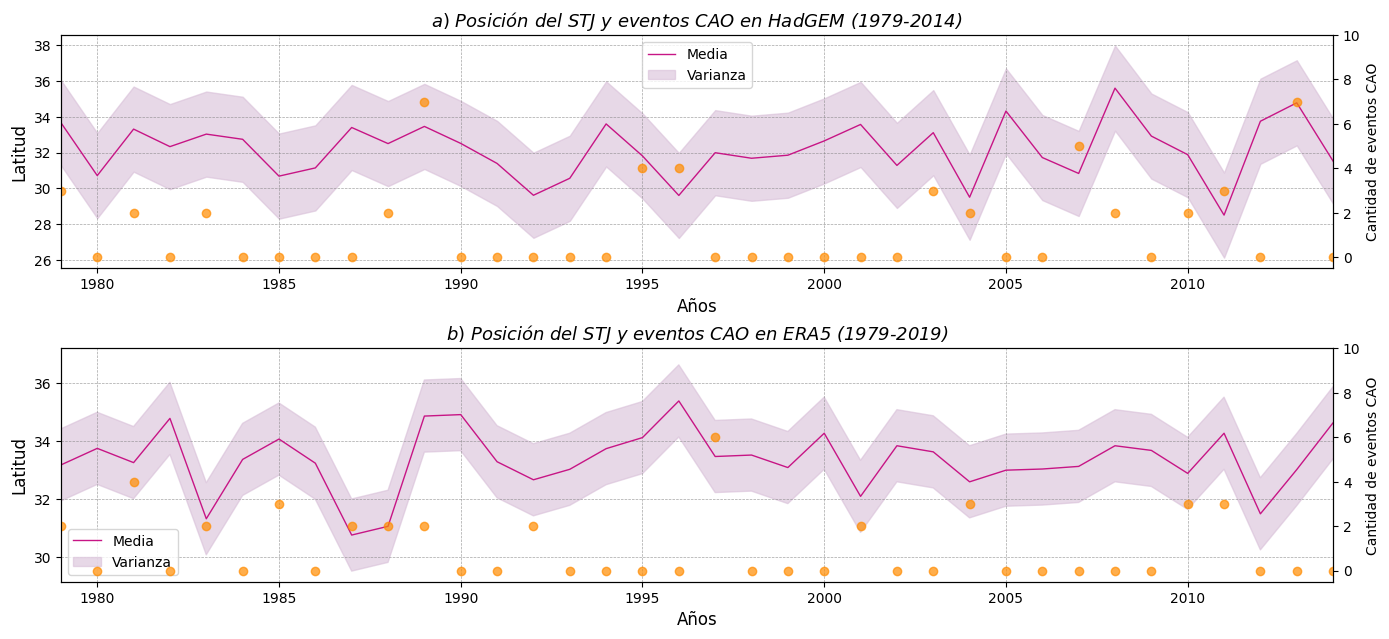

In [90]:
fig, axs = plt.subplots(2, 1, figsize=(14, 7))  # Crear subgráficos 2x1
plt.subplots_adjust(hspace=0.6)  # Ajustar el espacio entre los subgráficos

# Primer subplot - HadGEM
ax1 = axs[0]
ax1.plot(años, mean_POS, color='mediumvioletred', linewidth=1, label="Media")
ax1.fill_between(años, mean_POS + var_POS, mean_POS - var_POS, color='thistle', alpha=0.6, label="Varianza")
ax1.set_xlim([1979, 2014])
ax1.set_xlabel("Años", fontsize=12)
ax1.set_ylabel('Latitud', fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.set_title('a$)$ Posición del STJ y eventos CAO en HadGEM (1979-2014)', fontsize=13, color="k", fontstyle='italic')
ax1.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax1.legend()

# Eventos CAO en el primer subplot
ax1_twin = ax1.twinx()
ax1_twin.scatter(años, cantidad_eventos, color='darkorange', alpha=0.7, label="Eventos CAO")
ax1_twin.set_ylim([-0.5, 10])
ax1_twin.set_ylabel("Cantidad de eventos CAO", color='k')
ax1_twin.tick_params(axis='y', labelcolor='k')

# Segundo subplot - ERA5
ax2 = axs[1]
ax2.plot(añosE5, E5mean_POS, color='mediumvioletred', linewidth=1, label="Media")
ax2.fill_between(añosE5, E5mean_POS + E5var_POS, E5mean_POS - E5var_POS, color='thistle', alpha=0.6, label="Varianza")
ax2.set_xlim([1979, 2014])
ax2.set_xlabel("Años", fontsize=12)
ax2.set_ylabel('Latitud', fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.set_title('b$)$ Posición del STJ y eventos CAO en ERA5 (1979-2019)', fontsize=13, color="k", fontstyle='italic')
ax2.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax2.legend()

# Eventos CAO en el segundo subplot
ax2_twin = ax2.twinx()
ax2_twin.scatter(añosE5, cantidad_eventosE5, color='darkorange', alpha=0.7, label="Eventos CAO")
ax2_twin.set_ylim([-0.5, 10])
ax2_twin.set_ylabel("Cantidad de eventos CAO", color='k')
ax2_twin.tick_params(axis='y', labelcolor='k')

plt.tight_layout()
plt.subplots_adjust(top=0.87) 
# plt.suptitle('Eventos invernales de CAO vs posición del STJ',fontsize=14,color="k",fontstyle='italic',fontweight='bold');
#plt.show()

plt.savefig('figs/910_CAOsvsposicion')